<a href="https://colab.research.google.com/github/KNU-Probe/2024_Probe_Spring/blob/6%EC%A1%B0/%ED%94%84%EB%A1%9C%EB%B8%8C_%EC%B5%9C%EC%A2%85ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sklearn

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/probe동아리/electric_train.csv.crdownload",index_col=0)

df

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [ ]:
df.columns = df.columns.str.replace('electric_train.', '', regex=False)

In [ ]:
tr = df
tr['tm'] = pd.to_datetime(tr['tm'])

# '년', '월', '일', '시' 변수 생성
tr['year'] = tr['tm'].dt.year
tr['mon'] = tr['tm'].dt.month
tr['day'] = tr['tm'].dt.day
tr

#'시' 변수는 hh24 변수로 이미 존재

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,year,mon,day
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022,12,31
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022,12,31
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022,12,31
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57,2022,12,31


In [ ]:
tr['mean_qctr'] = tr['sum_qctr']/tr['n']

In [ ]:
#변수 순서 변경 및 sum_qctr,sum_load 변수 없앰
tr = tr[['num', 'tm', 'year', 'mon', 'day','hh24', 'mean_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec']]

tr

,num,tm,year,mon,day,hh24,mean_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [ ]:
#음수값 확인
out_tr=tr[tr['nph_ws_10m']<0]
wsout=tr['nph_ws_10m']==-99
wsout_index=tr[wsout].index
wsout_index

Index([  91272,  257880,  259481,  319272,  320873,  345576,  347177,  485880,
        512184,  513785,
       ...
       4001973, 4168581, 4379013, 5098005, 5124309, 5992364, 7447891, 7474195,
       7509283, 7561891],
      dtype='int64', length=169)

In [ ]:
# -99 전후 데이터의 평균으로 대체하는 함수
def rplc_out(df, df_out, col):
    df_out_idx = df[df_out].index
    for idx in df_out_idx:
        if idx == 0 or idx == len(df) - 1:
            continue  # 첫 행이나 마지막 행 스킵(평균치 낼 수 없음)

        prev_val = df.at[idx - 1, col]
        next_val = df.at[idx + 1, col]

        # 둘 중 하나가 -99인 경우 건너뜀
        if prev_val == -99 or next_val == -99:
            continue

        # 평균값으로 대체
        mean_val = np.mean([prev_val, next_val])
        df.loc[idx, col] = mean_val

In [ ]:
#선형보간

In [ ]:
import pandas as pd

# 'nph_ws_10m' 열 선형 보간
tr['nph_ws_10m'] = tr['nph_ws_10m'].interpolate(method='linear')

# 보간된 결과 확인
print(tr['nph_ws_10m'])

# 변경된 데이터프레임 확인
tr

1          1.8
2          2.1
3          2.5
4          1.7
5          1.6
          ... 
7593351    3.1
7593352    3.1
7593353    2.1
7593354    2.1
7593355    3.5
Name: nph_ws_10m, Length: 7593355, dtype: float64


<ipython-input-13-0b67d5fa2681>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['nph_ws_10m'] = tr['nph_ws_10m'].interpolate(method='linear')


,num,tm,year,mon,day,hh24,mean_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [ ]:
negative_elec = tr[tr['elec'] < 0]
# -99 값을 이전 행과 이후 행의 평균값으로 대체하는 함수
def replace_with_mean(series):
    for i in range(1, len(series) - 1):
        if series[i] == -99:
            series[i] = (series[i-1] + series[i+1]) / 2
    return series
# 첫번째 행이나 마지막행 없음, 연속된 -99값 존재x

# 'ele c' 열에 대해 함수 적용
tr['elec'] = replace_with_mean(tr['elec'])

<ipython-input-14-f1b80e93b7a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = (series[i-1] + series[i+1]) / 2
<ipython-input-14-f1b80e93b7a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = (series[i-1] + series[i+1]) / 2
<ipython-input-14-f1b80e93b7a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = (series[i-1] + series[i+1]) / 2
<ipython-input-14-f1b80e93b7a7>:6: SettingWithCopyWarning: 
A va

In [ ]:
tr = tr[['tm','num', 'year', 'mon', 'day', 'hh24', 'sum_load','n_mean_load', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec']]
tr

#num(격자넘버), mean_qctr(계약전력합계/공동주택 수), nph_ta(기온) 변수 제거함
#mean_qctr-n_mean_load(전력부하량평균) / ta_chi(체감온도)-ta 상관계수 높음
#상관계수 높은 변수 제거

,tm,num,year,mon,day,hh24,sum_load,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,2021-01-01 01:00:00,4821,2021,1,1,1,751.32,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56
2,2021-01-01 02:00:00,4821,2021,1,1,2,692.60,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78
3,2021-01-01 03:00:00,4821,2021,1,1,3,597.48,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17
4,2021-01-01 04:00:00,4821,2021,1,1,4,553.48,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34
5,2021-01-01 05:00:00,4821,2021,1,1,5,526.24,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,2022-12-31 20:00:00,20947,2022,12,31,20,6779.84,225.461986,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,2022-12-31 21:00:00,20947,2022,12,31,21,6802.40,225.461986,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,2022-12-31 22:00:00,20947,2022,12,31,22,6706.68,225.461986,47.4,2.1,0.0,0.2,5,1,129.33
7593354,2022-12-31 23:00:00,20947,2022,12,31,23,6355.88,225.461986,47.0,2.1,0.0,0.3,5,1,122.57


In [ ]:
## https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
## cyclical time encoding
# hh24 -> sin,cos & hh24 drop
tr['sin_hh24'] = np.sin(2*np.pi*tr.hh24/24)
tr['cos_hh24'] = np.cos(2*np.pi*tr.hh24/24)
tr.drop(['hh24'],axis=1,inplace=True)

<ipython-input-16-025c14f68450>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['sin_hh24'] = np.sin(2*np.pi*tr.hh24/24)


In [ ]:
# 로그 변환
#tr['sum_log'] = np.log1p(tr['sum_load'])

In [ ]:
## https://dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent
#기온 습도 고려한 불쾌 지수(THI)
tr['THI'] = 9/5*tr['nph_ta_chi'] - 0.55*(1-tr['nph_hm']/100)*(9/5*tr['nph_hm']-26)+32

tr

,tm,num,year,mon,day,sum_load,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,sin_hh24,cos_hh24,THI
1,2021-01-01 01:00:00,4821,2021,1,1,751.32,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56,2.588190e-01,0.965926,12.380671
2,2021-01-01 02:00:00,4821,2021,1,1,692.60,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78,5.000000e-01,0.866025,13.145639
3,2021-01-01 03:00:00,4821,2021,1,1,597.48,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17,7.071068e-01,0.707107,11.809024
4,2021-01-01 04:00:00,4821,2021,1,1,553.48,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34,8.660254e-01,0.500000,13.913775
5,2021-01-01 05:00:00,4821,2021,1,1,526.24,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73,9.659258e-01,0.258819,12.774100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,2022-12-31 20:00:00,20947,2022,12,31,6779.84,225.461986,46.3,3.1,0.0,-0.4,5,1,130.74,-8.660254e-01,0.500000,14.344631
7593352,2022-12-31 21:00:00,20947,2022,12,31,6802.40,225.461986,46.8,3.1,0.0,-0.5,5,1,131.18,-7.071068e-01,0.707107,14.058976
7593353,2022-12-31 22:00:00,20947,2022,12,31,6706.68,225.461986,47.4,2.1,0.0,0.2,5,1,129.33,-5.000000e-01,0.866025,15.198724
7593354,2022-12-31 23:00:00,20947,2022,12,31,6355.88,225.461986,47.0,2.1,0.0,0.3,5,1,122.57,-2.588190e-01,0.965926,15.458100


In [ ]:
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

def calculate_and_add_cdh(df):
    cdhs = []
    for num in df['num'].unique():
        temp = df[df['num'] == num]
        cdh = CDH(temp['nph_ta_chi'].values)
        cdhs.extend(cdh)
    return np.array(cdhs)

tr['CDH'] = calculate_and_add_cdh(tr)

In [ ]:
da = tr[['tm', 'num','year', 'mon', 'day', 'sin_hh24', 'cos_hh24','sum_load', 'n_mean_load', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec', 'THI','CDH']]
da.head()

#num(격자넘버), mean_qctr(계약전력합계/공동주택 수), nph_ta(기온) 변수 제거함
#mean_qctr-n_mean_load(전력부하량평균) / ta_chi(체감온도)-ta 상관계수 높음
#상관계수 높은 변수 제거

,tm,num,year,mon,day,sin_hh24,cos_hh24,sum_load,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,THI,CDH
1,2021-01-01 01:00:00,4821,2021,1,1,0.258819,0.965926,751.32,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56,12.380671,-27.0
2,2021-01-01 02:00:00,4821,2021,1,1,0.500000,0.866025,692.60,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78,13.145639,-53.6
3,2021-01-01 03:00:00,4821,2021,1,1,0.707107,0.707107,597.48,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17,11.809024,-80.9
4,2021-01-01 04:00:00,4821,2021,1,1,0.866025,0.500000,553.48,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34,13.913775,-107.1
5,2021-01-01 05:00:00,4821,2021,1,1,0.965926,0.258819,526.24,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73,12.774100,-133.9


In [ ]:
data = da.groupby('tm').mean()
data

,num,year,mon,day,sin_hh24,cos_hh24,sum_load,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,THI,CDH
tm,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,15437.400000,2020.0,1.0,1.0,2.588190e-01,0.965926,9943.856400,237.858015,44.351667,2.198333,0.001333,-7.056000,2.0,0.0,101.528000,6.369831,-33.056000
2020-01-01 02:00:00,15437.400000,2020.0,1.0,1.0,5.000000e-01,0.866025,9092.910000,237.858015,44.210667,2.357000,0.000000,-6.949667,2.0,0.0,92.998033,6.743268,-66.005667
2020-01-01 03:00:00,15437.400000,2020.0,1.0,1.0,7.071068e-01,0.707107,8187.193467,237.858015,48.535333,2.136333,0.001000,-6.851667,2.0,0.0,83.948100,5.392567,-98.857333
2020-01-01 04:00:00,15437.400000,2020.0,1.0,1.0,8.660254e-01,0.500000,7576.273067,237.858015,53.730000,1.945667,0.000000,-6.541667,2.0,0.0,77.917967,4.400662,-131.399000
2020-01-01 05:00:00,15437.400000,2020.0,1.0,1.0,9.659258e-01,0.258819,7324.154267,237.858015,58.235667,1.942667,0.000000,-5.849333,2.0,0.0,75.457667,4.945813,-163.248333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,15497.576779,2022.0,12.0,31.0,-8.660254e-01,0.500000,10586.696629,251.117294,59.514607,1.641573,0.000000,-1.355056,5.0,1.0,125.857940,12.495980,-305.761423
2022-12-31 21:00:00,15497.576779,2022.0,12.0,31.0,-7.071068e-01,0.707107,10503.535581,251.117294,61.966292,1.383521,0.000000,-1.945318,5.0,1.0,124.967978,11.851392,-304.555805
2022-12-31 22:00:00,15497.576779,2022.0,12.0,31.0,-5.000000e-01,0.866025,10323.548914,251.117294,63.524719,1.607491,0.000000,-2.240075,5.0,1.0,123.070449,11.698205,-305.253558


In [ ]:
data = data[['year', 'mon', 'day', 'sin_hh24', 'cos_hh24', 'nph_hm','nph_ws_10m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec', 'THI','CDH']]
da.head()

,tm,num,year,mon,day,sin_hh24,cos_hh24,sum_load,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,THI,CDH
1,2021-01-01 01:00:00,4821,2021,1,1,0.258819,0.965926,751.32,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56,12.380671,-27.0
2,2021-01-01 02:00:00,4821,2021,1,1,0.500000,0.866025,692.60,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78,13.145639,-53.6
3,2021-01-01 03:00:00,4821,2021,1,1,0.707107,0.707107,597.48,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17,11.809024,-80.9
4,2021-01-01 04:00:00,4821,2021,1,1,0.866025,0.500000,553.48,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34,13.913775,-107.1
5,2021-01-01 05:00:00,4821,2021,1,1,0.965926,0.258819,526.24,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73,12.774100,-133.9


In [ ]:
#데이터 인덱스 재설정

data.reset_index(drop=True, inplace=True)
data

,year,mon,day,sin_hh24,cos_hh24,nph_hm,nph_ws_10m,nph_ta_chi,weekday,week_name,elec,THI,CDH
0,2020.0,1.0,1.0,2.588190e-01,0.965926,44.351667,2.198333,-7.056000,2.0,0.0,101.528000,6.369831,-33.056000
1,2020.0,1.0,1.0,5.000000e-01,0.866025,44.210667,2.357000,-6.949667,2.0,0.0,92.998033,6.743268,-66.005667
2,2020.0,1.0,1.0,7.071068e-01,0.707107,48.535333,2.136333,-6.851667,2.0,0.0,83.948100,5.392567,-98.857333
3,2020.0,1.0,1.0,8.660254e-01,0.500000,53.730000,1.945667,-6.541667,2.0,0.0,77.917967,4.400662,-131.399000
4,2020.0,1.0,1.0,9.659258e-01,0.258819,58.235667,1.942667,-5.849333,2.0,0.0,75.457667,4.945813,-163.248333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022.0,12.0,31.0,-8.660254e-01,0.500000,59.514607,1.641573,-1.355056,5.0,1.0,125.857940,12.495980,-305.761423
26300,2022.0,12.0,31.0,-7.071068e-01,0.707107,61.966292,1.383521,-1.945318,5.0,1.0,124.967978,11.851392,-304.555805
26301,2022.0,12.0,31.0,-5.000000e-01,0.866025,63.524719,1.607491,-2.240075,5.0,1.0,123.070449,11.698205,-305.253558
26302,2022.0,12.0,31.0,-2.588190e-01,0.965926,64.291386,1.757303,-2.294757,5.0,1.0,117.743446,11.678838,-307.431086


In [ ]:
data['weekday'] = data['weekday'].astype(str)
data['week_name'] = data['week_name'].astype(str)
data['year'] = data['year'].astype(str)

<ipython-input-24-038a7141de86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['weekday'].astype(str)
<ipython-input-24-038a7141de86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_name'] = data['week_name'].astype(str)
<ipython-input-24-038a7141de86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
data

,year,mon,day,sin_hh24,cos_hh24,nph_hm,nph_ws_10m,nph_ta_chi,weekday,week_name,elec,THI,CDH
0,2020.0,1.0,1.0,2.588190e-01,0.965926,44.351667,2.198333,-7.056000,2.0,0.0,101.528000,6.369831,-33.056000
1,2020.0,1.0,1.0,5.000000e-01,0.866025,44.210667,2.357000,-6.949667,2.0,0.0,92.998033,6.743268,-66.005667
2,2020.0,1.0,1.0,7.071068e-01,0.707107,48.535333,2.136333,-6.851667,2.0,0.0,83.948100,5.392567,-98.857333
3,2020.0,1.0,1.0,8.660254e-01,0.500000,53.730000,1.945667,-6.541667,2.0,0.0,77.917967,4.400662,-131.399000
4,2020.0,1.0,1.0,9.659258e-01,0.258819,58.235667,1.942667,-5.849333,2.0,0.0,75.457667,4.945813,-163.248333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022.0,12.0,31.0,-8.660254e-01,0.500000,59.514607,1.641573,-1.355056,5.0,1.0,125.857940,12.495980,-305.761423
26300,2022.0,12.0,31.0,-7.071068e-01,0.707107,61.966292,1.383521,-1.945318,5.0,1.0,124.967978,11.851392,-304.555805
26301,2022.0,12.0,31.0,-5.000000e-01,0.866025,63.524719,1.607491,-2.240075,5.0,1.0,123.070449,11.698205,-305.253558
26302,2022.0,12.0,31.0,-2.588190e-01,0.965926,64.291386,1.757303,-2.294757,5.0,1.0,117.743446,11.678838,-307.431086


In [ ]:
data2020=data[data["year"] == '2020.0']
data2021 = data[data["year"] == '2021.0']
data2022 = data[data["year"] == '2022.0']


In [ ]:
data2021

,year,mon,day,sin_hh24,cos_hh24,nph_hm,nph_ws_10m,nph_ta_chi,weekday,week_name,elec,THI,CDH
8783,2021.0,1.0,1.0,-2.449294e-16,1.000000,67.037000,2.375000,-7.637000,4.0,0.0,119.993333,2.074667,-388.004667
8784,2021.0,1.0,1.0,2.588190e-01,0.965926,67.669900,2.406020,-7.738796,4.0,0.0,107.043077,2.086256,-365.189298
8785,2021.0,1.0,1.0,5.000000e-01,0.866025,67.820067,2.308361,-8.054181,4.0,0.0,95.804281,1.601980,-369.289298
8786,2021.0,1.0,1.0,7.071068e-01,0.707107,67.792308,2.117057,-8.503010,4.0,0.0,84.087860,0.787873,-374.320401
8787,2021.0,1.0,1.0,8.660254e-01,0.500000,68.435452,2.047826,-8.821070,4.0,0.0,78.351940,0.548393,-379.779599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17538,2021.0,12.0,31.0,-9.659258e-01,0.258819,38.280268,2.563545,-6.096656,4.0,0.0,133.195017,9.619334,-388.537793
17539,2021.0,12.0,31.0,-8.660254e-01,0.500000,39.567893,2.487291,-6.610033,4.0,0.0,133.954314,7.898725,-385.718395
17540,2021.0,12.0,31.0,-7.071068e-01,0.707107,41.271906,2.481940,-7.135117,4.0,0.0,132.543946,6.375001,-384.369565
17541,2021.0,12.0,31.0,-5.000000e-01,0.866025,42.076923,2.304013,-7.551505,4.0,0.0,130.386120,5.281889,-383.969900


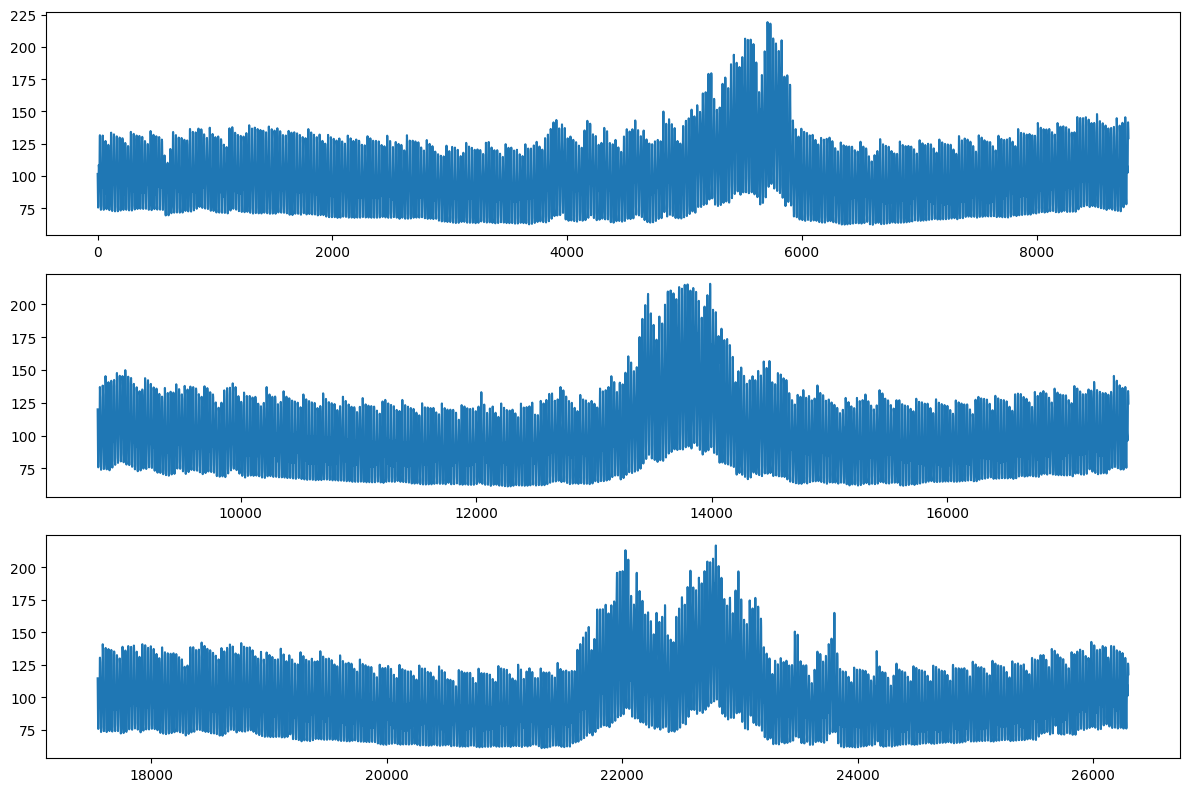

In [ ]:
# 결과 시각화
plt.figure(figsize=(12, 8))

# 원래 y 값 플롯
plt.subplot(3, 1, 1)
plt.plot(data2020.index, data2020['elec'])


# 예측된 y 값 플롯
plt.subplot(3, 1, 2)
plt.plot(data2021.index, data2021['elec'])


plt.subplot(3, 1, 3)
plt.plot(data2022.index,data2022['elec'])

plt.tight_layout()
plt.show()

2023 데이터가 다른 데이터와 양상이 너무 달라 학습하는 데이터에서 뺄까 고민중

In [ ]:
data.columns

Index(['year', 'mon', 'day', 'sin_hh24', 'cos_hh24', 'nph_hm', 'nph_ws_10m',
       'nph_ta_chi', 'weekday', 'week_name', 'elec', 'THI', 'CDH'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 범주형 변수를 원핫인코딩하여 변환
one_hot_encoded = encoder.fit_transform(data[['weekday', 'week_name', 'year']])

# 변환된 결과를 데이터프레임으로 변환
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['weekday', 'week_name', 'year']))

# 원핫인코딩된 결과 출력
print(one_hot_encoded_df)

#특정 시점이면 결과 1/아니면 0

       weekday_0.0  weekday_1.0  weekday_2.0  weekday_3.0  weekday_4.0  \
0              0.0          0.0          1.0          0.0          0.0   
1              0.0          0.0          1.0          0.0          0.0   
2              0.0          0.0          1.0          0.0          0.0   
3              0.0          0.0          1.0          0.0          0.0   
4              0.0          0.0          1.0          0.0          0.0   
...            ...          ...          ...          ...          ...   
26299          0.0          0.0          0.0          0.0          0.0   
26300          0.0          0.0          0.0          0.0          0.0   
26301          0.0          0.0          0.0          0.0          0.0   
26302          0.0          0.0          0.0          0.0          0.0   
26303          0.0          0.0          0.0          0.0          0.0   

       weekday_5.0  weekday_6.0  week_name_0.0  week_name_1.0  year_2020.0  \
0              0.0          0.0  

In [ ]:
#기존 데이터프레임 'data'에 원핫인코딩된 결과 추가(기존 열에 추가적으로 원핫인코딩 열 포함)
data_encoded = pd.concat([data, one_hot_encoded_df], axis=1)
data_encoded

,year,mon,day,sin_hh24,cos_hh24,nph_hm,nph_ws_10m,nph_ta_chi,weekday,week_name,...,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,week_name_0.0,week_name_1.0,year_2020.0,year_2021.0,year_2022.0,year_2023.0
0,2020.0,1.0,1.0,2.588190e-01,0.965926,44.351667,2.198333,-7.056000,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2020.0,1.0,1.0,5.000000e-01,0.866025,44.210667,2.357000,-6.949667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2020.0,1.0,1.0,7.071068e-01,0.707107,48.535333,2.136333,-6.851667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2020.0,1.0,1.0,8.660254e-01,0.500000,53.730000,1.945667,-6.541667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2020.0,1.0,1.0,9.659258e-01,0.258819,58.235667,1.942667,-5.849333,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022.0,12.0,31.0,-8.660254e-01,0.500000,59.514607,1.641573,-1.355056,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26300,2022.0,12.0,31.0,-7.071068e-01,0.707107,61.966292,1.383521,-1.945318,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26301,2022.0,12.0,31.0,-5.000000e-01,0.866025,63.524719,1.607491,-2.240075,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26302,2022.0,12.0,31.0,-2.588190e-01,0.965926,64.291386,1.757303,-2.294757,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data_encoded.columns

Index(['year', 'mon', 'day', 'sin_hh24', 'cos_hh24', 'nph_hm', 'nph_ws_10m',
       'nph_ta_chi', 'weekday', 'week_name', 'elec', 'THI', 'CDH',
       'weekday_0.0', 'weekday_1.0', 'weekday_2.0', 'weekday_3.0',
       'weekday_4.0', 'weekday_5.0', 'weekday_6.0', 'week_name_0.0',
       'week_name_1.0', 'year_2020.0', 'year_2021.0', 'year_2022.0',
       'year_2023.0'],
      dtype='object')

In [ ]:
#year,weekend,week_name 변수 원핫인코딩된 변수로 변경
data_encoded = data_encoded[['mon', 'day', 'sin_hh24', 'cos_hh24','nph_hm', 'nph_ws_10m',
       'nph_ta_chi','elec','THI','CDH','weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'week_name_0.0', 'week_name_1.0',
       'year_2020.0', 'year_2021.0', 'year_2022.0', 'year_2023.0' ]]

data_encoded

,mon,day,sin_hh24,cos_hh24,nph_hm,nph_ws_10m,nph_ta_chi,elec,THI,CDH,...,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,week_name_0.0,week_name_1.0,year_2020.0,year_2021.0,year_2022.0,year_2023.0
0,1.0,1.0,2.588190e-01,0.965926,44.351667,2.198333,-7.056000,101.528000,6.369831,-33.056000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,5.000000e-01,0.866025,44.210667,2.357000,-6.949667,92.998033,6.743268,-66.005667,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,7.071068e-01,0.707107,48.535333,2.136333,-6.851667,83.948100,5.392567,-98.857333,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,8.660254e-01,0.500000,53.730000,1.945667,-6.541667,77.917967,4.400662,-131.399000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,9.659258e-01,0.258819,58.235667,1.942667,-5.849333,75.457667,4.945813,-163.248333,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,12.0,31.0,-8.660254e-01,0.500000,59.514607,1.641573,-1.355056,125.857940,12.495980,-305.761423,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26300,12.0,31.0,-7.071068e-01,0.707107,61.966292,1.383521,-1.945318,124.967978,11.851392,-304.555805,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26301,12.0,31.0,-5.000000e-01,0.866025,63.524719,1.607491,-2.240075,123.070449,11.698205,-305.253558,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26302,12.0,31.0,-2.588190e-01,0.965926,64.291386,1.757303,-2.294757,117.743446,11.678838,-307.431086,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


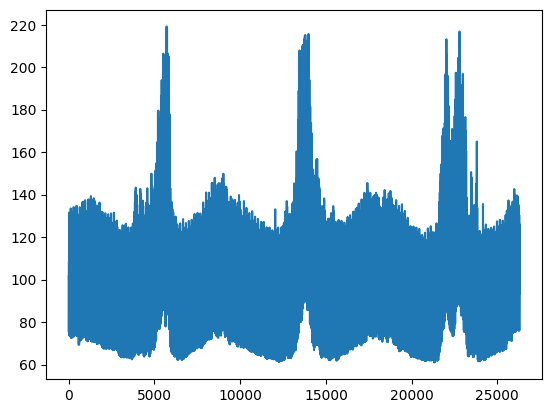

In [ ]:
plt.plot(data_encoded.index, data_encoded['elec'])

In [ ]:
#Adj-Rsquare
def adjusted_r_squared(y_true, y_pred, n, p):

    r_squared = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    return adjusted_r_squared

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
#머신러닝 모델

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor

data3 = data_encoded.sample(frac = 0.5, replace = False)

# 데이터셋을 상반기와 하반기로 분할
data_bottom_half = data3.iloc[:int(len(data3) * 0.2)]  # 하반기 데이터
data_top_half = data3.iloc[int(len(data3) * 0.2):]  # 상반기 데이터

# 특성과 타깃 변수로 분할
X_bottom_half = data_bottom_half.drop(columns=['elec'])  # 하반기 특성 변수
y_bottom_half = data_bottom_half['elec']  # 하반기 타깃 변수

X_top_half = data_top_half.drop(columns=['elec'])  # 상반기 특성 변수
y_top_half = data_top_half['elec']  # 상반기 타깃 변수

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = X_top_half, X_bottom_half, y_top_half, y_bottom_half

n_samples = len(y_test)
n_features = 23  # 설명 변수의 수 (예시에서는 임의로 2로 설정)

In [ ]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

y_pred =random_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 12.652653210857608
Adjusted R-squared: 0.9795652177753806


#예측된 값과 실제 값 비교 그래프

바꾸는주우웅


In [ ]:
# #SMAPE 평가지표
# def SMAPE(true, pred):
#     return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

# smpe = SMAPE(y_test, y_pred)
# print("Mean Squared Error:", smpe )
# adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
# print("Adjusted R-squared:", adj_r2)

# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              n_estimators=1000000,
                              random_state=42,
                              colsample_bytree=0.9,
                              eta=0.11,
                              max_depth=7,
                              min_child_weight=5,
                              subsample=0.8999999999999999)

xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=0)

In [ ]:
# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              random_state=42)

xgb_model.fit(X_train, y_train, verbose=0)

# 테스트 데이터셋으로 예측
y_pred = xgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 7.693251176002439
Adjusted R-squared: 0.9875749449731224


In [ ]:
eval_set = [(X_test, y_test)]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor


# # xg 부스터 모델 생성
# model =xgb.XGBRegressor()

# # 하이퍼파라미터 그리드 설정


# param_grid = {
#         'objective' :['reg:squarederror'],
#         'eta' : 0.01,
#         'min_child_weight' : np.arange(1, 8, 1),
#         'max_depth' : np.arange(3,9,1) ,
#         'colsample_bytree' :np.arange(0.8, 1.0, 0.1),
#         'subsample' :np.arange(0.5, 1.0, 0.1)
#         }

# # GridSearchCV 설정
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# # 그리드 서치 실행
# grid_search.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# # 최적의 파라미터 및 성능 출력
# print("Best parameters found: ", grid_search.best_params_)
# print("Best MSE score: ", -grid_search.best_score_)  # 음수로 되어있으므로 -를 붙여야 함

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor


# # xg 부스터 모델 생성
# model =xgb.XGBRegressor()

# # 하이퍼파라미터 그리드 설정


# param_grid = {
#         'objective' :['reg:squarederror'],
#         n_estimators:100
#         'eta' : 0.01,
#         'min_child_weight' : np.arange(1, 8, 1),
#         'max_depth' : np.arange(3,9,1) ,
#         'colsample_bytree' :np.arange(0.8, 1.0, 0.1),
#         'subsample' :np.arange(0.5, 1.0, 0.1)
#         }

# # GridSearchCV 설정
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# # 그리드 서치 실행
# grid_search.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=50, verbose=False)

# # 최적의 파라미터 및 성능 출력
# print("Best parameters found: ", grid_search.best_params_)
# print("Best MSE score: ", -grid_search.best_score_)  # 음수로 되어있으므로 -를 붙여야 함

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# data_bottom_half.drop(columns=['elec'])  # 하반기 특성 변수
# y_bottom_half = data_bottom_half['elec']


# data4=data_encoded
# X=data4.drop(columns=['elec'])
# y= data4['elec']

# # 데이터 분할: 훈련 세트와 테스트 세트
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 랜덤 포레스트 모델 훈련
# rf_model = RandomForestRegressor( random_state=42)
# rf_model.fit(X_train, y_train)

# # 예측 수행
# y_pred = rf_model.predict(X_test)

# # 모델 평가
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
# adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
# print("Adjusted R-squared:", adj_r2)

# # 원래 y 값과 예측된 y 값 비교
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
# plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Original vs Predicted Values')
# plt.legend()
# plt.show()

#하이퍼파라미터 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# xg 부스터 모델 생성
model =xgb.XGBRegressor()

# 하이퍼파라미터 그리드 설정


param_grid = {
        'objective' :['reg:squarederror'],
        'n_estimators':[100],
        'eta' : [0.01],
        'min_child_weight' : np.arange(1, 8, 1),
        'max_depth' : np.arange(3,11,1) ,
        'colsample_bytree' :np.arange(0.8, 1.0, 0.1),
        'subsample' :np.arange(0.5, 1.0, 0.1)
        }

# GridSearchCV 설정
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# 그리드 서치 실행
grid_search.fit(X_train, y_train, verbose=False)

# 최적의 파라미터 및 성능 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best MSE score: ", -grid_search.best_score_)  # 음수로 되어있으므로 -를 붙여야 함

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
Best parameters found:  {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8999999999999999}
Best MSE score:  114.64474491221402


In [ ]:
bes=pd.DataFrame(gs.cv_results_)

NameError: name 'pd' is not defined

In [ ]:
bes

Best: -7.592864 using {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 1300, 'subsample': 0.9}
-110.725000 (5.838203) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
-30.885634 (2.477508) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9}
-15.580640 (1.578685) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9}
-11.497442 (1.297360) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 400, 'subsample': 0.9}
-9.937007 (1.185603) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 500, 'subsample': 0.9}
-9.106927 (1.137370) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 600, 's

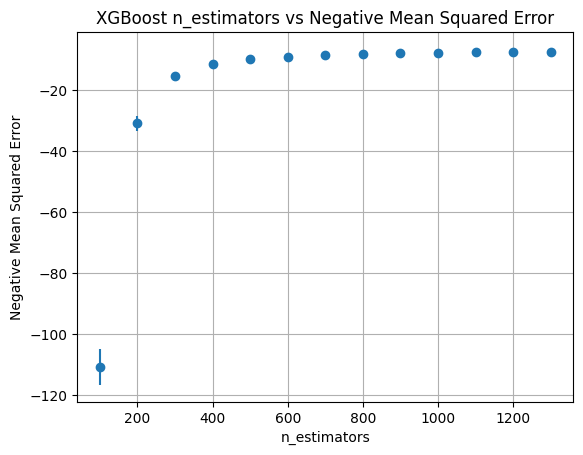

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 예제 데이터 생성 (임의 데이터 사용)
np.random.seed(42)

# 모델 초기화
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': np.arange(100,1400, 100),
    'eta': [0.01],
    'min_child_weight': [6],
    'max_depth': [10],
    'colsample_bytree': [0.9],
    'subsample': [0.9]
}

# 교차 검증 설정
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 그리드 서치 설정
grid_search =GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold)

# 그리드 서치 실행
grid_search.fit(X_train, y_train, verbose=False)

# 결과 요약
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# n_estimators 값 추출
n_estimators = [param['n_estimators'] for param in params]

# 결과 시각화
plt.errorbar(n_estimators, means, yerr=stds, fmt='o')
plt.title("XGBoost n_estimators vs Negative Mean Squared Error")
plt.xlabel('n_estimators')
plt.ylabel('Negative Mean Squared Error')
plt.grid(True)
plt.savefig('n_estimators.png')
plt.show()

Best: -7.117245 using {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 3900, 'subsample': 0.9}
-7.323032 (1.027485) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2000, 'subsample': 0.9}
-7.299547 (1.026627) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2100, 'subsample': 0.9}
-7.281468 (1.027253) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2200, 'subsample': 0.9}
-7.263356 (1.025489) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2300, 'subsample': 0.9}
-7.246493 (1.022936) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2400, 'subsample': 0.9}
-7.232591 (1.021893) with: {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 2500, '

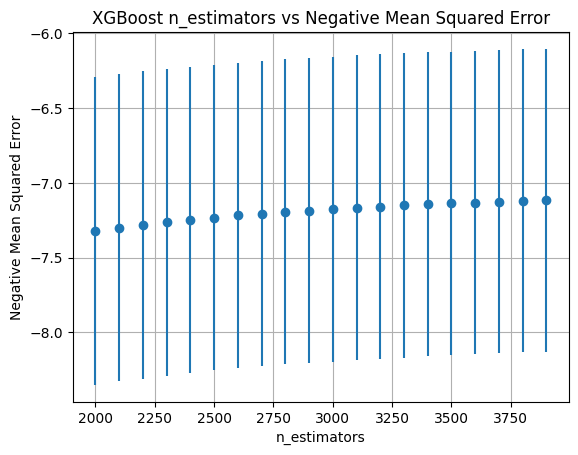

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 예제 데이터 생성 (임의 데이터 사용)
np.random.seed(42)

# 모델 초기화
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': np.arange(2000,4000, 100),
    'eta': [0.01],
    'min_child_weight': [6],
    'max_depth': [10],
    'colsample_bytree': [0.9],
    'subsample': [0.9]
}

# 교차 검증 설정
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 그리드 서치 설정
grid_search =GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold)

# 그리드 서치 실행
grid_search.fit(X_train, y_train, verbose=False)

# 결과 요약
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# n_estimators 값 추출
n_estimators = [param['n_estimators'] for param in params]

# 결과 시각화
plt.errorbar(n_estimators, means, yerr=stds, fmt='o')
plt.title("XGBoost n_estimators vs Negative Mean Squared Error")
plt.xlabel('n_estimators')
plt.ylabel('Negative Mean Squared Error')
plt.grid(True)
plt.savefig('n_estimators.png')
plt.show()

#하이퍼 없는 xgv버전

In [ ]:
#,early_stopping_rounds=700, eval_set=eval_set,eval_set = [(X_train, y_train), (X_test, y_test)]

Mean Squared Error: 7.693251176002439
Adjusted R-squared: 0.9875749449731224


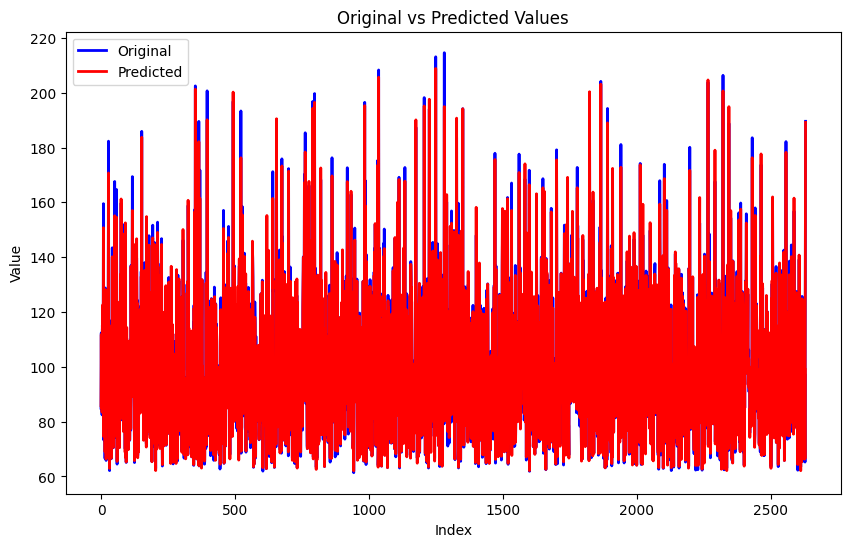

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 예제 데이터 생성
np.random.seed(42)

# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              random_state=42)


xgb_model.fit(X_train, y_train, verbose=0)

# 테스트 데이터셋으로 예측
y_pred = xgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)


# 원래 y 값과 예측된 y 값 비교
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Predicted Values')
plt.legend()
plt.show()

#하이퍼있는 버전

Mean Squared Error: 7.1345575867390405
Adjusted R-squared: 0.9884772681172587


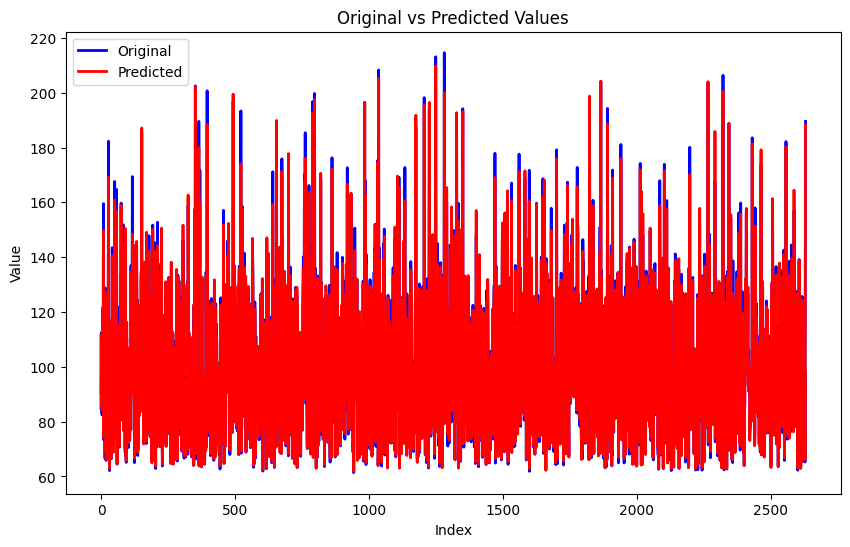

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 예제 데이터 생성
np.random.seed(42)



params = {
    'colsample_bytree': 0.9,
    'eta': 0.01,
    'max_depth': 10,
    'min_child_weight': 6,
    'n_estimators': 1400,
    'objective': 'reg:squarederror',
    'subsample': 0.9
}

# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(**params  ,
                              random_state=42)


xgb_model.fit(X_train, y_train, verbose=0)

# 테스트 데이터셋으로 예측
y_pred = xgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)


# 원래 y 값과 예측된 y 값 비교
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
#100
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
# plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)

In [ ]:
#1000
#Mean Squared Error: 9.772464068192882
# #Adjusted R-squared: 0.9843799851400379
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
# plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)

In [ ]:
#1000
# # Mean Squared Error: 9.772464068192882
# # Adjusted R-squared: 0.9843799851400379
# # plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
# plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)

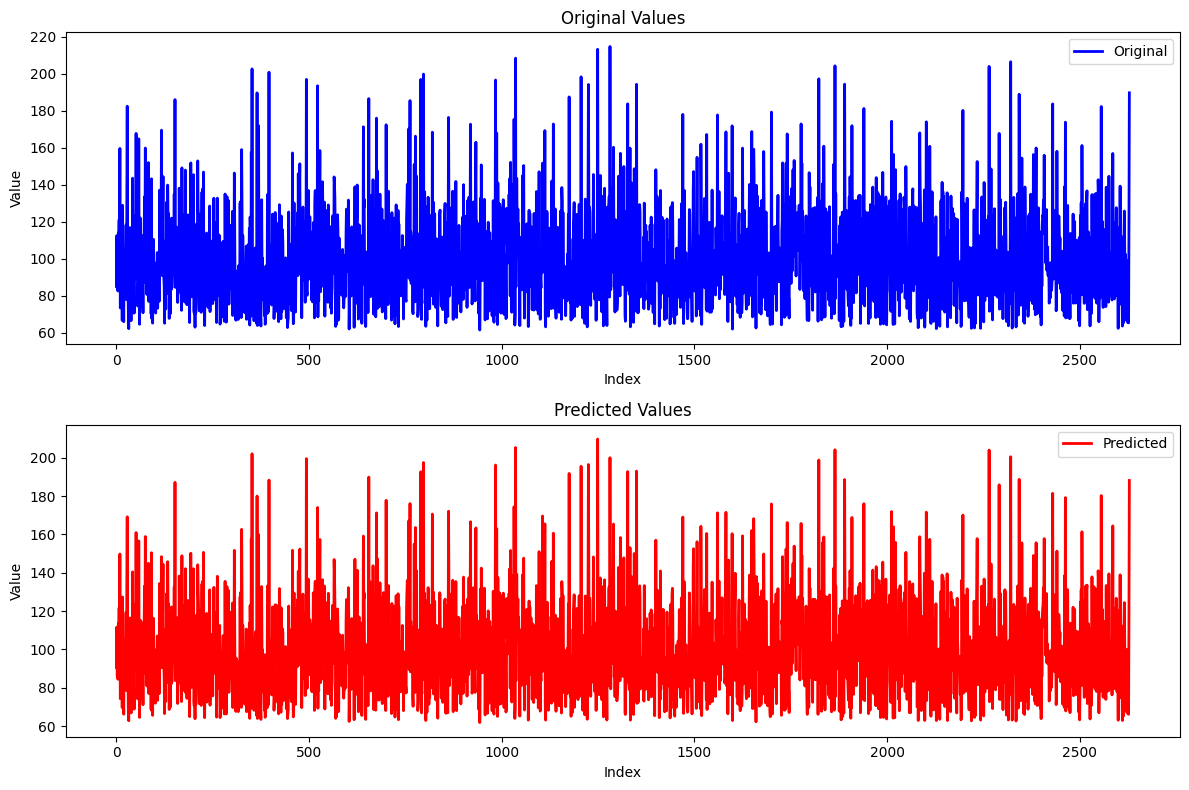

In [ ]:
# 결과 시각화
plt.figure(figsize=(12, 8))

# 원래 y 값 플롯
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original Values')
plt.legend()

# 예측된 y 값 플롯
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error: 7.693251176002439
Adjusted R-squared: 0.9875749449731224


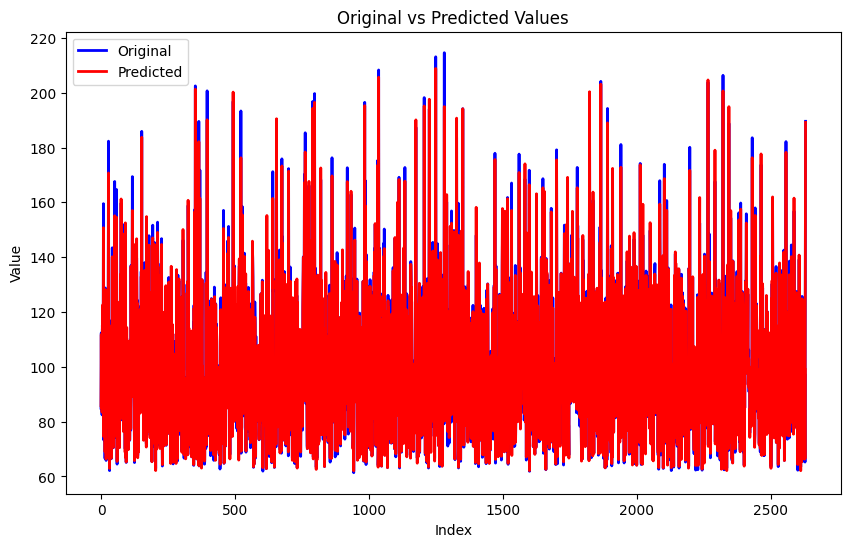

In [ ]:
# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              random_state=42)

xgb_model.fit(X_train, y_train, verbose=0)

# 테스트 데이터셋으로 예측
y_pred1 = xgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred1, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

# 원래 y 값과 예측된 y 값 비교
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Original', color='blue', linewidth=2)
plt.plot(np.arange(len(y_pred1)), y_pred1, label='Predicted', color='red', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Predicted Values')
plt.legend()
plt.show()